## Import Libraries

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import pickle

## Import Datasets

In [37]:
exfil=pd.read_excel(r"Datasets/Data_exfiltration.xlsx")
dd_http=pd.read_excel(r"Datasets/DDoS_HTTP.xlsx")
d_http=pd.read_excel(r"Datasets/DoS_HTTP.xlsx")
dd_tcp=pd.read_excel(r"Datasets/DDoS_TCP.xlsx")
dd_udp=pd.read_csv(r"Datasets/DDoS_UDP.csv")
d_udp=pd.read_excel(r"Datasets/DoS_UDP.xlsx")
key_l=pd.read_excel(r"Datasets/Keylogging.xlsx")
o_scan=pd.read_excel(r"Datasets/OS_Scan.xlsx")
s_scan=pd.read_excel(r"Datasets/Service_Scan.xlsx")

C:\Users\vsneg\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3444: DtypeWarning: Columns (4,7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [38]:
pd.set_option('display.max_columns', None)
df_list = [exfil, dd_http, d_http, dd_tcp, dd_udp, d_udp, key_l, o_scan, s_scan]  
df = pd.concat(df_list)

In [39]:
df

,stime,flgs,proto,saddr,sport,dir,daddr,dport,pkts,bytes,state,srcid,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,record,attack,category,subcategory
0,1.529284e+09,e,udp,192.168.100.6,138.0,->,192.168.100.255,138.0,4,986,INT,0.0.0.0,1.529285e+09,15,1080.378906,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,4,0,986,0,0.002777,0.002777,0.000000,_x0013__x0010_,0,Normal,Normal
1,1.529284e+09,e,tcp,192.168.100.3,60864.0,<?>,172.217.25.138,443.0,12,1053,FIN,0.0.0.0,1.529284e+09,12,112.047569,0.024268,0.015937,NaN,NaN,0.072805,0.005787,0.044681,NaN,NaN,NaN,NaN,8,4,697,356,0.098173,0.062473,0.026774,_x0013__x0010_,0,Normal,Normal
2,1.529284e+09,e,udp,192.168.100.7,138.0,->,192.168.100.255,138.0,4,1086,INT,0.0.0.0,1.529285e+09,23,731.272095,0.000104,0.000004,NaN,NaN,0.000209,0.000101,0.000108,NaN,NaN,NaN,NaN,4,0,1086,0,0.004102,0.004102,0.000000,_x0013__x0010_,0,Normal,Normal
3,1.529284e+09,e,arp,192.168.100.149,NaN,who,192.168.100.6,NaN,26,1560,CON,0.0.0.0,1.529285e+09,10,1162.980103,0.000121,0.000027,NaN,NaN,0.001569,0.000082,0.000164,NaN,NaN,NaN,NaN,13,13,780,780,0.021496,0.010318,0.010318,_x0013__x0010_,1,Theft,Data_Exfiltration
4,1.529284e+09,e,tcp,192.168.100.150,36682.0,->,192.168.100.3,22.0,28,5098,FIN,0.0.0.0,1.529284e+09,30,0.489598,0.489598,0.000000,NaN,NaN,0.489598,0.489598,0.489598,NaN,NaN,NaN,NaN,13,15,1640,3458,55.147282,24.509903,28.594887,_x0013__x0010_,1,Theft,Data_Exfiltration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,1.526346e+09,e,tcp,192.168.100.150,51760,->,192.168.100.3,3306,13,1113,FIN,0.0.0.0,1.526346e+09,20596,0.197693,0.197693,0.000000,NaN,NaN,0.197693,0.197693,0.197693,NaN,NaN,NaN,NaN,7,6,532,581,60.700176,30.350088,25.291740,_x0013__x0010_,1,Reconnaissance,Service_Scan
19995,1.526346e+09,e,tcp,192.168.100.149,34720,->,192.168.100.3,3306,13,1113,FIN,0.0.0.0,1.526346e+09,20597,0.198108,0.198108,0.000000,NaN,NaN,0.198108,0.198108,0.198108,NaN,NaN,NaN,NaN,7,6,532,581,60.573021,30.286510,25.238758,_x0013__x0010_,1,Reconnaissance,Service_Scan
19996,1.526346e+09,e,tcp,192.168.100.148,37616,->,192.168.100.3,3306,13,1113,FIN,0.0.0.0,1.526346e+09,20598,0.198896,0.198896,0.000000,NaN,NaN,0.198896,0.198896,0.198896,NaN,NaN,NaN,NaN,7,6,532,581,60.333038,30.166519,25.138765,_x0013__x0010_,1,Reconnaissance,Service_Scan
19997,1.526346e+09,e,tcp,192.168.100.147,46406,->,192.168.100.3,3306,13,1113,FIN,0.0.0.0,1.526346e+09,20599,0.198036,0.198036,0.000000,NaN,NaN,0.198036,0.198036,0.198036,NaN,NaN,NaN,NaN,7,6,532,581,60.595043,30.297522,25.247934,_x0013__x0010_,1,Reconnaissance,Service_Scan


## Pre-Processing + Exploratory Data Analysis

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 151358 entries, 0 to 19998
Data columns (total 37 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   stime        151358 non-null  float64
 1   flgs         151358 non-null  object 
 2   proto        151358 non-null  object 
 3   saddr        151358 non-null  object 
 4   sport        151183 non-null  object 
 5   dir          151358 non-null  object 
 6   daddr        151358 non-null  object 
 7   dport        151183 non-null  object 
 8   pkts         151358 non-null  int64  
 9   bytes        151358 non-null  int64  
 10  state        151358 non-null  object 
 11  srcid        151358 non-null  object 
 12  ltime        151358 non-null  float64
 13  seq          151358 non-null  int64  
 14  dur          151358 non-null  float64
 15  mean         151358 non-null  float64
 16  stddev       151358 non-null  float64
 17  smac         0 non-null       float64
 18  dmac         0 non-null  

In [41]:
df.describe()

,stime,pkts,bytes,ltime,seq,dur,mean,stddev,smac,dmac,sum,min,max,soui,doui,sco,dco,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack
count,1.513580e+05,151358.000000,1.513580e+05,1.513580e+05,151358.000000,151358.000000,151358.000000,151358.000000,0.0,0.0,151358.000000,151358.000000,151358.000000,0.0,0.0,0.0,0.0,151358.000000,151358.000000,1.513580e+05,1.513580e+05,151358.000000,151358.000000,151358.000000,151358.000000
mean,1.527717e+09,48.735581,5.066854e+04,1.527717e+09,8355.825705,25.406177,0.883064,0.384448,NaN,NaN,4.051087,0.390231,1.240393,NaN,NaN,NaN,NaN,35.418848,13.316733,2.954954e+04,2.111900e+04,3301.992032,133.254231,58.243025,0.995567
std,6.908368e+05,2598.487934,4.078591e+06,6.908475e+05,5660.058824,78.410543,1.383873,0.585149,NaN,NaN,40.369602,1.144133,1.745057,NaN,NaN,NaN,NaN,1885.133646,1052.066777,2.320484e+06,3.045954e+06,24595.072465,1995.557897,754.838302,0.066435
min,1.526344e+09,1.000000,6.000000e+01,1.526344e+09,1.000000,0.000000,0.000000,0.000000,NaN,NaN,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,4.200000e+01,0.000000e+00,0.000000,0.000000,0.000000,0.000000
25%,1.526876e+09,2.000000,1.800000e+02,1.526877e+09,3502.000000,0.003479,0.000076,0.000000,NaN,NaN,0.000119,0.000000,0.000119,NaN,NaN,NaN,NaN,1.000000,0.000000,7.400000e+01,0.000000e+00,0.251936,0.000000,0.000000,1.000000
50%,1.528089e+09,10.000000,6.000000e+02,1.528089e+09,7587.000000,15.501317,0.008109,0.005670,NaN,NaN,0.016199,0.000000,0.016199,NaN,NaN,NaN,NaN,6.000000,1.000000,6.000000e+02,6.000000e+01,0.345181,0.208716,0.000000,1.000000
75%,1.528099e+09,10.000000,1.562000e+03,1.528099e+09,12588.000000,29.361616,1.758210,0.533614,NaN,NaN,10.546156,0.000229,2.715997,NaN,NaN,NaN,NaN,10.000000,4.000000,8.400000e+02,7.660000e+02,0.838818,0.314531,0.152950,1.000000
max,1.529382e+09,322677.000000,8.191219e+08,1.529382e+09,20600.000000,3535.861572,4.990964,2.493551,NaN,NaN,3502.989502,4.985136,4.999999,NaN,NaN,NaN,NaN,234761.000000,161338.000000,4.747344e+08,8.181230e+08,1000000.000000,250000.000000,58823.527344,1.000000


In [42]:
df.isnull().sum()

stime               0
flgs                0
proto               0
saddr               0
sport             175
dir                 0
daddr               0
dport             175
pkts                0
bytes               0
state               0
srcid               0
ltime               0
seq                 0
dur                 0
mean                0
stddev              0
smac           151358
dmac           151358
sum                 0
min                 0
max                 0
soui           151358
doui           151358
sco            151358
dco            151358
spkts               0
dpkts               0
sbytes              0
dbytes              0
rate                0
srate               0
drate               0
record              0
attack              0
category            0
subcategory         0
dtype: int64

### Visualizing null values in each column

<AxesSubplot:>

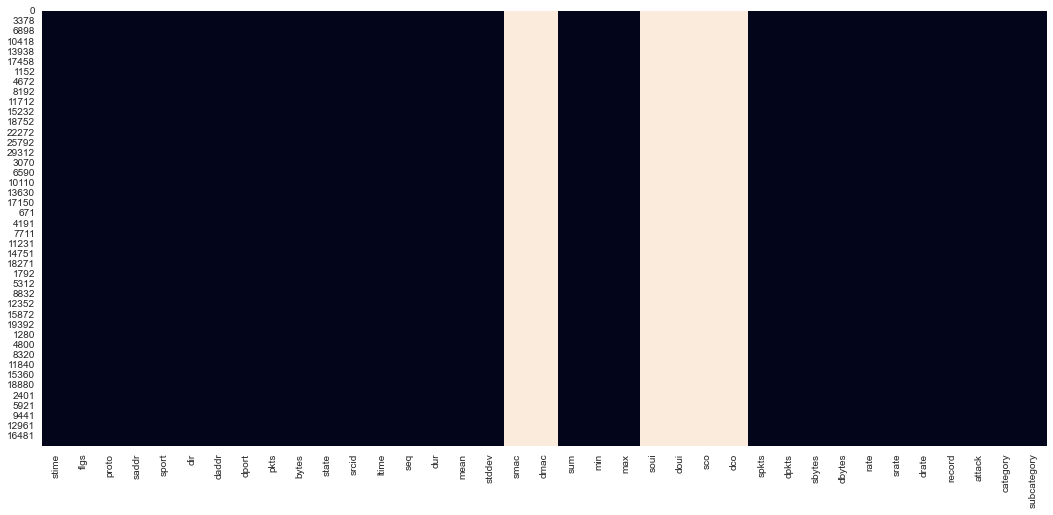

In [43]:
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.heatmap(df.isnull(), cbar=False, ax=ax)

In [44]:
df.drop(['smac', 'dmac', 'soui', 'doui', 'sco', 'dco', 'stime', 'flgs', 'dir', 'srcid', 'ltime' ], axis=1, inplace=True)

In [45]:
df = df.dropna(axis=0) 

In [46]:
df.isnull().sum()

proto          0
saddr          0
sport          0
daddr          0
dport          0
pkts           0
bytes          0
state          0
seq            0
dur            0
mean           0
stddev         0
sum            0
min            0
max            0
spkts          0
dpkts          0
sbytes         0
dbytes         0
rate           0
srate          0
drate          0
record         0
attack         0
category       0
subcategory    0
dtype: int64

In [47]:
df.shape

(151183, 26)

### Attack Count 

In [48]:
df.attack.value_counts()

1    150576
0       607
Name: attack, dtype: int64

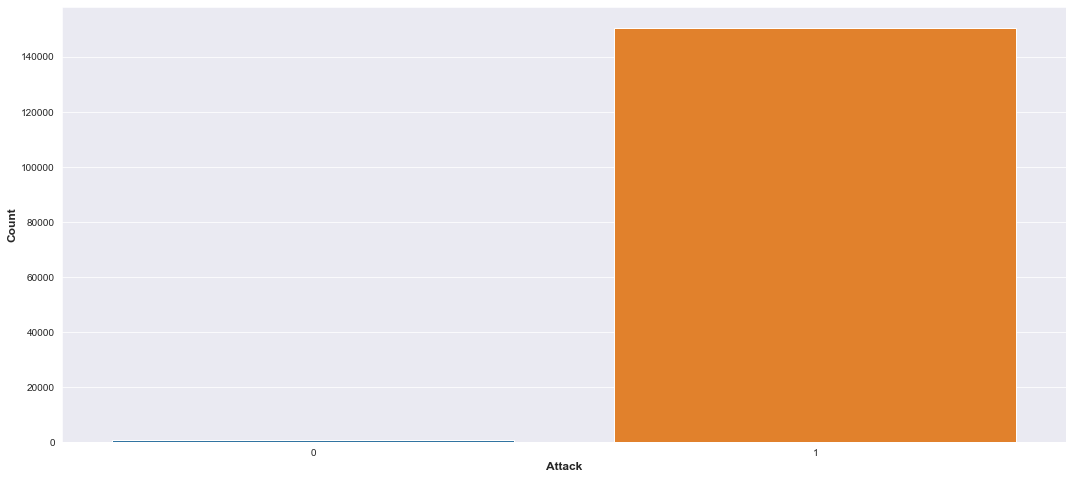

In [49]:
sns.set_style('darkgrid')
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='attack', data = df, ax=ax)
plt.xlabel('Attack',fontweight="bold",fontsize=12)
plt.ylabel('Count',fontweight="bold",fontsize=12)
plt.show()

### Category Count

In [50]:
df.category.value_counts()

DDoS              59719
DoS               49669
Reconnaissance    39610
Theft              1578
Normal              607
Name: category, dtype: int64

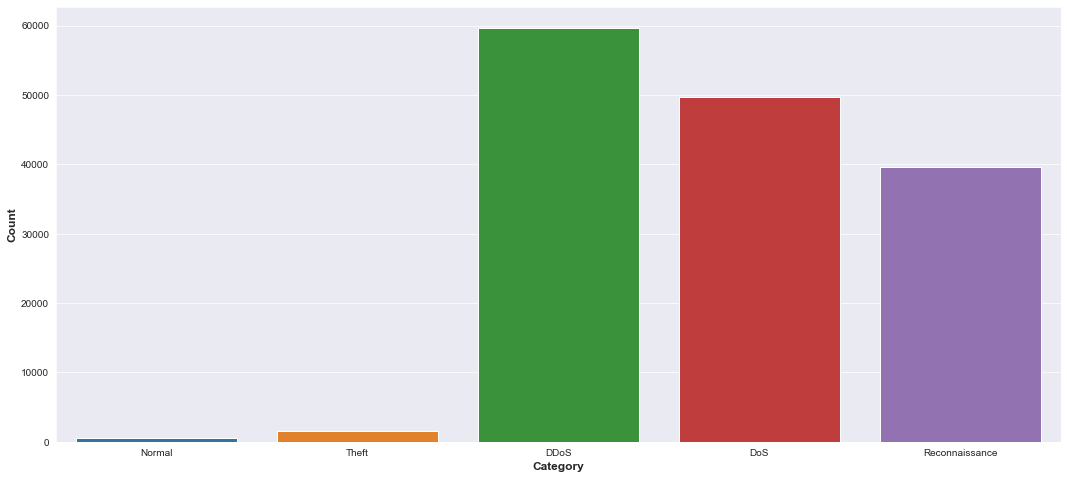

In [51]:
sns.set_style('darkgrid')
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='category', data = df, ax=ax)
plt.xlabel('Category',fontweight="bold",fontsize=12)
plt.ylabel('Count',fontweight="bold",fontsize=12)
plt.show()

### Subcategory Count

In [52]:
df.subcategory.value_counts()

HTTP                 49421
UDP                  39976
TCP                  19991
Service_Scan         19888
OS_Fingerprint       19722
Keylogging            1464
Normal                 607
Data_Exfiltration      114
Name: subcategory, dtype: int64

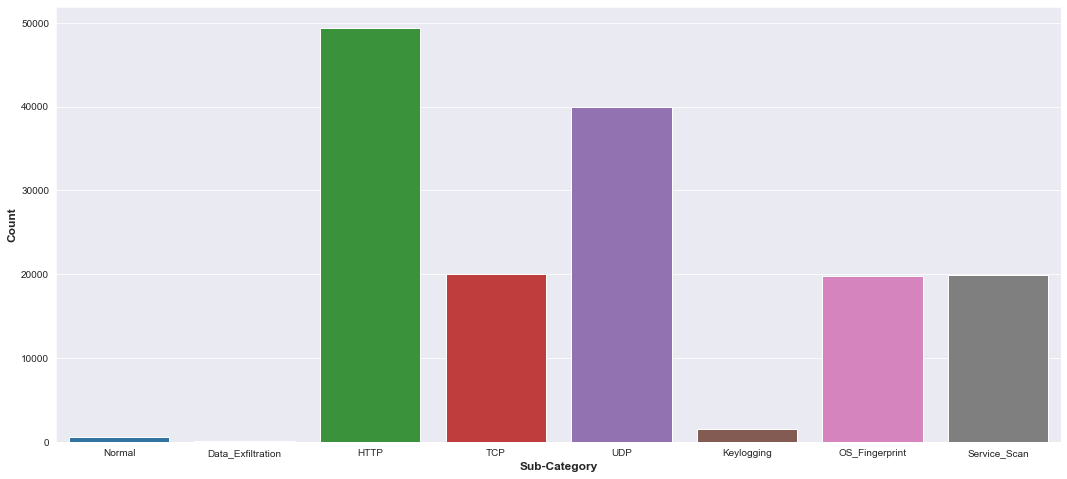

In [53]:
sns.set_style('darkgrid')
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(x ='subcategory', data = df, ax=ax)
plt.xlabel('Sub-Category',fontweight="bold",fontsize=12)
plt.ylabel('Count',fontweight="bold",fontsize=12)
plt.show()

In [54]:
df.saddr.value_counts()

192.168.100.147              66886
192.168.100.148              37576
192.168.100.149              26180
192.168.100.150              12982
192.168.100.3                 6379
192.168.100.7                  973
192.168.100.6                   82
192.168.100.5                   53
192.168.100.46                  27
192.168.100.4                   14
192.168.100.55                   7
fe80::c0c0:aa20:45b9:bdd9        5
fe80::250:56ff:febe:254          5
fe80::250:56ff:febe:89ee         4
fe80::250:56ff:febe:bf1a         2
fe80::250:56ff:febe:c038         2
192.168.100.27                   2
52.64.239.193                    1
118.215.114.65                   1
fe80::250:56ff:febe:26db         1
fe80::250:56ff:febe:e9d9         1
Name: saddr, dtype: int64

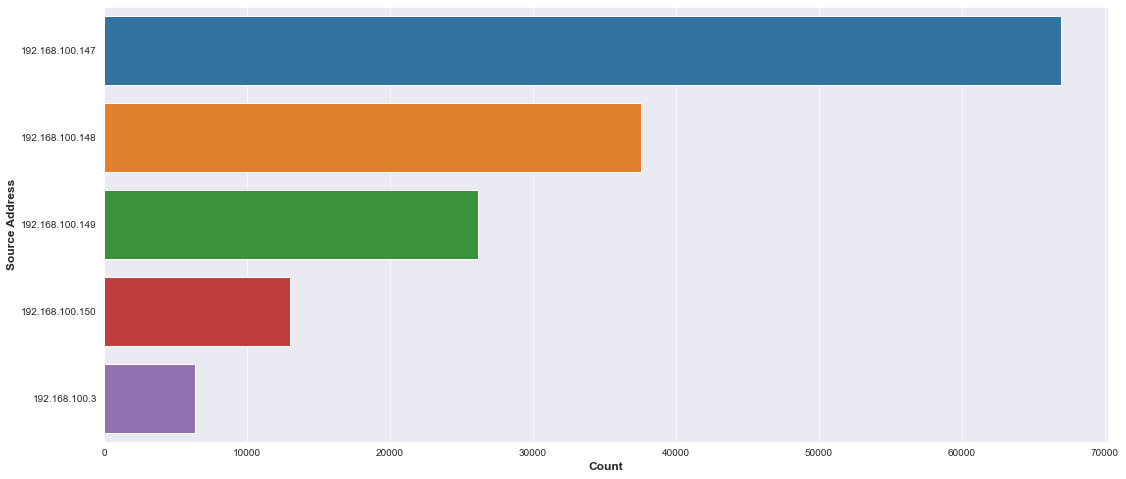

In [55]:
sns.set_style('darkgrid')
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y ='saddr', data = df, ax=ax, order=df.saddr.value_counts().iloc[:5].index)
plt.xlabel('Count',fontweight="bold",fontsize=12)
plt.ylabel('Source Address',fontweight="bold",fontsize=12)
plt.show()

In [56]:
df.saddr.value_counts()

192.168.100.147              66886
192.168.100.148              37576
192.168.100.149              26180
192.168.100.150              12982
192.168.100.3                 6379
192.168.100.7                  973
192.168.100.6                   82
192.168.100.5                   53
192.168.100.46                  27
192.168.100.4                   14
192.168.100.55                   7
fe80::c0c0:aa20:45b9:bdd9        5
fe80::250:56ff:febe:254          5
fe80::250:56ff:febe:89ee         4
fe80::250:56ff:febe:bf1a         2
fe80::250:56ff:febe:c038         2
192.168.100.27                   2
52.64.239.193                    1
118.215.114.65                   1
fe80::250:56ff:febe:26db         1
fe80::250:56ff:febe:e9d9         1
Name: saddr, dtype: int64

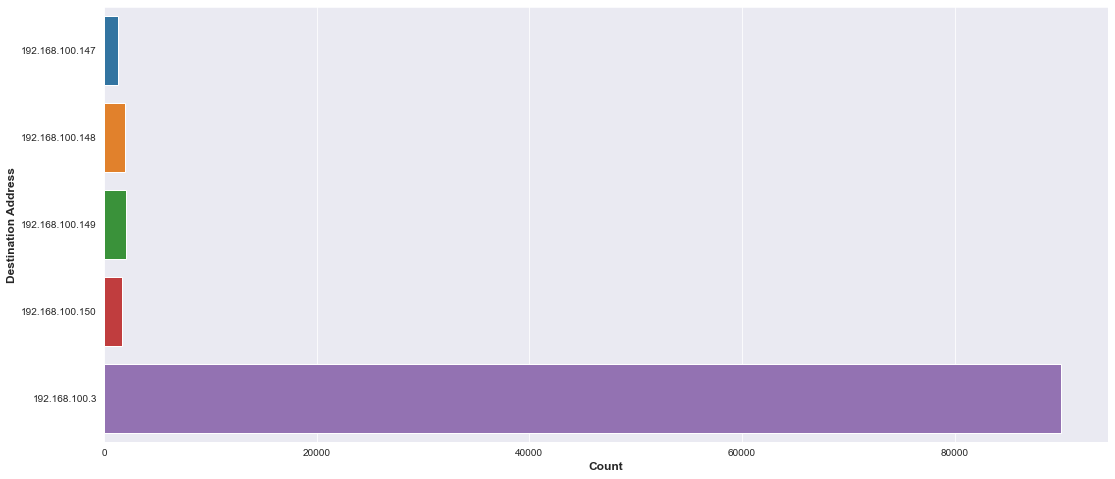

In [57]:
sns.set_style('darkgrid')
fig_dims = (18, 8)
fig, ax = plt.subplots(figsize=fig_dims)
sns.countplot(y ='daddr', data = df, ax=ax, order=df.saddr.value_counts().iloc[:5].index)
plt.xlabel('Count',fontweight="bold",fontsize=12)
plt.ylabel('Destination Address',fontweight="bold",fontsize=12)
plt.show()

In [58]:
df

,proto,saddr,sport,daddr,dport,pkts,bytes,state,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,record,attack,category,subcategory
0,udp,192.168.100.6,138.0,192.168.100.255,138.0,4,986,INT,15,1080.378906,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,986,0,0.002777,0.002777,0.000000,_x0013__x0010_,0,Normal,Normal
1,tcp,192.168.100.3,60864.0,172.217.25.138,443.0,12,1053,FIN,12,112.047569,0.024268,0.015937,0.072805,0.005787,0.044681,8,4,697,356,0.098173,0.062473,0.026774,_x0013__x0010_,0,Normal,Normal
2,udp,192.168.100.7,138.0,192.168.100.255,138.0,4,1086,INT,23,731.272095,0.000104,0.000004,0.000209,0.000101,0.000108,4,0,1086,0,0.004102,0.004102,0.000000,_x0013__x0010_,0,Normal,Normal
4,tcp,192.168.100.150,36682.0,192.168.100.3,22.0,28,5098,FIN,30,0.489598,0.489598,0.000000,0.489598,0.489598,0.489598,13,15,1640,3458,55.147282,24.509903,28.594887,_x0013__x0010_,1,Theft,Data_Exfiltration
5,tcp,192.168.100.150,36684.0,192.168.100.3,22.0,31,5472,FIN,31,3.207045,3.207045,0.000000,3.207045,3.207045,3.207045,14,17,1802,3670,9.354405,4.053576,4.989016,_x0013__x0010_,1,Theft,Data_Exfiltration
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,tcp,192.168.100.150,51760,192.168.100.3,3306,13,1113,FIN,20596,0.197693,0.197693,0.000000,0.197693,0.197693,0.197693,7,6,532,581,60.700176,30.350088,25.291740,_x0013__x0010_,1,Reconnaissance,Service_Scan
19995,tcp,192.168.100.149,34720,192.168.100.3,3306,13,1113,FIN,20597,0.198108,0.198108,0.000000,0.198108,0.198108,0.198108,7,6,532,581,60.573021,30.286510,25.238758,_x0013__x0010_,1,Reconnaissance,Service_Scan
19996,tcp,192.168.100.148,37616,192.168.100.3,3306,13,1113,FIN,20598,0.198896,0.198896,0.000000,0.198896,0.198896,0.198896,7,6,532,581,60.333038,30.166519,25.138765,_x0013__x0010_,1,Reconnaissance,Service_Scan
19997,tcp,192.168.100.147,46406,192.168.100.3,3306,13,1113,FIN,20599,0.198036,0.198036,0.000000,0.198036,0.198036,0.198036,7,6,532,581,60.595043,30.297522,25.247934,_x0013__x0010_,1,Reconnaissance,Service_Scan


## Label Enconding

In [25]:
le = LabelEncoder()

In [26]:
le = LabelEncoder()
df1 = df[['proto', 'saddr','daddr','state','record']].apply(le.fit_transform)

In [27]:
df1

,proto,saddr,daddr,state,record
0,3,11,18,4,2
1,2,6,8,3,2
2,3,12,18,4,2
4,2,4,19,3,2
5,2,4,19,3,2
...,...,...,...,...,...
19994,2,4,19,3,2
19995,2,3,19,3,2
19996,2,2,19,3,2
19997,2,1,19,3,2


In [28]:
df.drop(['proto', 'saddr','daddr','state','record'], axis=1, inplace=True)

C:\Users\vsneg\anaconda3\lib\site-packages\pandas\core\frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
df["proto"]=df1["proto"].to_numpy()
df["saddr"]=df1["saddr"].to_numpy()
df["daddr"]=df1["daddr"].to_numpy()
df["state"]=df1["state"].to_numpy()
df["record"]=df1["record"].to_numpy()

C:\Users\vsneg\AppData\Local\Temp/ipykernel_7864/745726979.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["proto"]=df1["proto"].to_numpy()
C:\Users\vsneg\AppData\Local\Temp/ipykernel_7864/745726979.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df["saddr"]=df1["saddr"].to_numpy()
C:\Users\vsneg\AppData\Local\Temp/ipykernel_7864/745726979.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See 

In [30]:
df

,sport,dport,pkts,bytes,seq,dur,mean,stddev,sum,min,max,spkts,dpkts,sbytes,dbytes,rate,srate,drate,attack,category,subcategory,proto,saddr,daddr,state,record
0,138.0,138.0,4,986,15,1080.378906,0.000000,0.000000,0.000000,0.000000,0.000000,4,0,986,0,0.002777,0.002777,0.000000,0,Normal,Normal,3,11,18,4,2
1,60864.0,443.0,12,1053,12,112.047569,0.024268,0.015937,0.072805,0.005787,0.044681,8,4,697,356,0.098173,0.062473,0.026774,0,Normal,Normal,2,6,8,3,2
2,138.0,138.0,4,1086,23,731.272095,0.000104,0.000004,0.000209,0.000101,0.000108,4,0,1086,0,0.004102,0.004102,0.000000,0,Normal,Normal,3,12,18,4,2
4,36682.0,22.0,28,5098,30,0.489598,0.489598,0.000000,0.489598,0.489598,0.489598,13,15,1640,3458,55.147282,24.509903,28.594887,1,Theft,Data_Exfiltration,2,4,19,3,2
5,36684.0,22.0,31,5472,31,3.207045,3.207045,0.000000,3.207045,3.207045,3.207045,14,17,1802,3670,9.354405,4.053576,4.989016,1,Theft,Data_Exfiltration,2,4,19,3,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19994,51760,3306,13,1113,20596,0.197693,0.197693,0.000000,0.197693,0.197693,0.197693,7,6,532,581,60.700176,30.350088,25.291740,1,Reconnaissance,Service_Scan,2,4,19,3,2
19995,34720,3306,13,1113,20597,0.198108,0.198108,0.000000,0.198108,0.198108,0.198108,7,6,532,581,60.573021,30.286510,25.238758,1,Reconnaissance,Service_Scan,2,3,19,3,2
19996,37616,3306,13,1113,20598,0.198896,0.198896,0.000000,0.198896,0.198896,0.198896,7,6,532,581,60.333038,30.166519,25.138765,1,Reconnaissance,Service_Scan,2,2,19,3,2
19997,46406,3306,13,1113,20599,0.198036,0.198036,0.000000,0.198036,0.198036,0.198036,7,6,532,581,60.595043,30.297522,25.247934,1,Reconnaissance,Service_Scan,2,1,19,3,2


In [31]:
# df.to_csv(r"Datasets/Data.csv', index=False)